In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
ord_enc = OrdinalEncoder()
%matplotlib inline

# Data Preprocessing 

In [2]:
data = pd.read_csv("C:\\Users\\nidhi19\\OneDrive - York University\\Documents\\Varun\\CIND 820 Project\\COVID19 cases - June 30th.csv")
data = data.dropna().reset_index()
data = data.drop(columns=['index', '_id', 'Assigned_ID'])

In [3]:
data['Episode Date'] = pd.to_datetime(data['Episode Date'])
data['Episode Date'] = (data['Episode Date'] - data['Episode Date'].min()).dt.days

data['Reported Date'] = pd.to_datetime(data['Reported Date'])
data['Reported Date'] = (data['Reported Date'] - data['Reported Date'].min()).dt.days

In [4]:
data.head(5)

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,1,0,FEMALE,RESOLVED,No,No,No,No,No,No
1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,0,0,MALE,RESOLVED,No,No,No,Yes,No,No
2,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,15,29,FEMALE,RESOLVED,No,No,No,No,No,No
3,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,26,33,FEMALE,RESOLVED,No,No,No,No,No,No
4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,30,34,MALE,RESOLVED,No,No,No,No,No,No


# Algorithms only work with number, therefore, we have to convert categorical data into numerical values.

In [5]:
data_encoded = data.copy()
for col in data.columns:
    data_encoded["Encoded_"+col] = ord_enc.fit_transform(data[[col]])

In [6]:
data_encoded.columns

Index(['Outbreak Associated', 'Age Group', 'Neighbourhood Name', 'FSA',
       'Source of Infection', 'Classification', 'Episode Date',
       'Reported Date', 'Client Gender', 'Outcome', 'Currently Hospitalized',
       'Currently in ICU', 'Currently Intubated', 'Ever Hospitalized',
       'Ever in ICU', 'Ever Intubated', 'Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated', 'Encoded_Ever Hospitalized',
       'Encoded_Ever in ICU', 'Encoded_Ever Intubated'],
      dtype='object')

In [7]:
data_encoded.head()

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,...,Encoded_Episode Date,Encoded_Reported Date,Encoded_Client Gender,Encoded_Outcome,Encoded_Currently Hospitalized,Encoded_Currently in ICU,Encoded_Currently Intubated,Encoded_Ever Hospitalized,Encoded_Ever in ICU,Encoded_Ever Intubated
0,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,1,0,FEMALE,RESOLVED,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,0,0,MALE,RESOLVED,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,15,29,FEMALE,RESOLVED,...,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,26,33,FEMALE,RESOLVED,...,7.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,30,34,MALE,RESOLVED,...,8.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Importance

# Logistic Regression for Feature importance

# Ever Hospitalized 

Feature 0: Outbreak Associated, Score: -0.50541
Feature 1: Age Group, Score: 0.55440
Feature 2: Neighbourhood Name, Score: -0.00019
Feature 3: FSA, Score: 0.00074
Feature 4: Source of Infection, Score: -0.25076
Feature 5: Classification, Score: -0.12122
Feature 6: Episode Date, Score: -0.00014
Feature 7: Reported Date, Score: 0.00038
Feature 8: Client Gender, Score: 0.06106
Feature 9: Outcome, Score: -1.71713
Feature 10: Currently Hospitalized, Score: 0.07326
Feature 11: Currently in ICU, Score: 0.02154
Feature 12: Currently Intubated, Score: 0.01292


C:\Users\nidhi19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


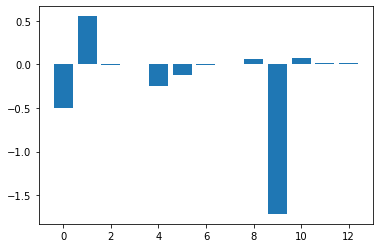

In [8]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever Hospitalized'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i].replace("Encoded_", ''),v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()  

# Ever in ICU

Feature 0: Outbreak Associated, Score: -0.14377
Feature 1: Age Group, Score: 0.37743
Feature 2: Neighbourhood Name, Score: -0.00075
Feature 3: FSA, Score: -0.00222
Feature 4: Source of Infection, Score: -0.31691
Feature 5: Classification, Score: -0.14879
Feature 6: Episode Date, Score: -0.00482
Feature 7: Reported Date, Score: 0.00307
Feature 8: Client Gender, Score: 0.19230
Feature 9: Outcome, Score: -2.02221
Feature 10: Currently Hospitalized, Score: 0.02318
Feature 11: Currently in ICU, Score: 0.12784
Feature 12: Currently Intubated, Score: 0.07654


C:\Users\nidhi19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


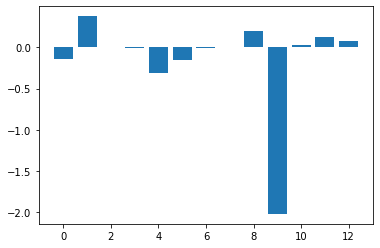

In [9]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever in ICU'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i].replace("Encoded_", ''),v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show() 

# Ever Intubated

Feature 0: Outbreak Associated, Score: 1.18220
Feature 1: Age Group, Score: 0.32338
Feature 2: Neighbourhood Name, Score: -0.00363
Feature 3: FSA, Score: -0.00517
Feature 4: Source of Infection, Score: -0.12053
Feature 5: Classification, Score: -0.35061
Feature 6: Episode Date, Score: -0.01778
Feature 7: Reported Date, Score: 0.01374
Feature 8: Client Gender, Score: 0.14987
Feature 9: Outcome, Score: -2.50856
Feature 10: Currently Hospitalized, Score: -0.39143
Feature 11: Currently in ICU, Score: 0.28491
Feature 12: Currently Intubated, Score: 0.38721


C:\Users\nidhi19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


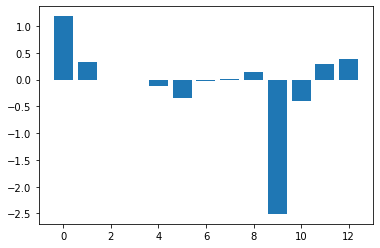

In [10]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever Intubated'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i].replace("Encoded_", ''),v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show() 

# Decision Tree Based Feature Importance

# Ever Hospitalized

Feature 0: Encoded_Outbreak Associated, Score: 0.02767
Feature 1: Encoded_Age Group, Score: 0.08298
Feature 2: Encoded_Neighbourhood Name, Score: 0.13387
Feature 3: Encoded_FSA, Score: 0.12359
Feature 4: Encoded_Source of Infection, Score: 0.03842
Feature 5: Encoded_Classification, Score: 0.00435
Feature 6: Encoded_Episode Date, Score: 0.22351
Feature 7: Encoded_Reported Date, Score: 0.21243
Feature 8: Encoded_Client Gender, Score: 0.02639
Feature 9: Encoded_Outcome, Score: 0.12478
Feature 10: Encoded_Currently Hospitalized, Score: 0.00200
Feature 11: Encoded_Currently in ICU, Score: 0.00000
Feature 12: Encoded_Currently Intubated, Score: 0.00000


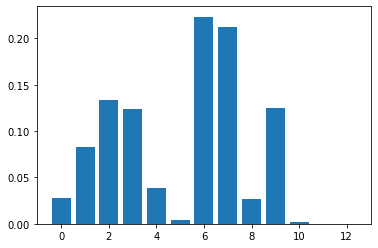

In [11]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever Hospitalized'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show() 

# Ever in ICU

Feature 0: Encoded_Outbreak Associated, Score: 0.00391
Feature 1: Encoded_Age Group, Score: 0.06633
Feature 2: Encoded_Neighbourhood Name, Score: 0.13884
Feature 3: Encoded_FSA, Score: 0.12089
Feature 4: Encoded_Source of Infection, Score: 0.09546
Feature 5: Encoded_Classification, Score: 0.00250
Feature 6: Encoded_Episode Date, Score: 0.22938
Feature 7: Encoded_Reported Date, Score: 0.20254
Feature 8: Encoded_Client Gender, Score: 0.03113
Feature 9: Encoded_Outcome, Score: 0.09969
Feature 10: Encoded_Currently Hospitalized, Score: 0.00056
Feature 11: Encoded_Currently in ICU, Score: 0.00879
Feature 12: Encoded_Currently Intubated, Score: 0.00000


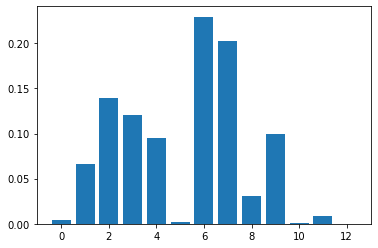

In [12]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever in ICU'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Ever Intubated

Feature 0: Encoded_Outbreak Associated, Score: 0.00768
Feature 1: Encoded_Age Group, Score: 0.06551
Feature 2: Encoded_Neighbourhood Name, Score: 0.12894
Feature 3: Encoded_FSA, Score: 0.12495
Feature 4: Encoded_Source of Infection, Score: 0.09559
Feature 5: Encoded_Classification, Score: 0.00250
Feature 6: Encoded_Episode Date, Score: 0.21676
Feature 7: Encoded_Reported Date, Score: 0.21585
Feature 8: Encoded_Client Gender, Score: 0.03030
Feature 9: Encoded_Outcome, Score: 0.07676
Feature 10: Encoded_Currently Hospitalized, Score: 0.00929
Feature 11: Encoded_Currently in ICU, Score: 0.00000
Feature 12: Encoded_Currently Intubated, Score: 0.02587


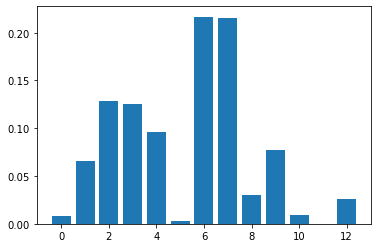

In [14]:
feats = ['Encoded_Outbreak Associated',
       'Encoded_Age Group', 'Encoded_Neighbourhood Name', 'Encoded_FSA',
       'Encoded_Source of Infection', 'Encoded_Classification',
       'Encoded_Episode Date', 'Encoded_Reported Date',
       'Encoded_Client Gender', 'Encoded_Outcome',
       'Encoded_Currently Hospitalized', 'Encoded_Currently in ICU',
       'Encoded_Currently Intubated']
dep = 'Encoded_Ever Intubated'
X = data_encoded[feats]
Y = data_encoded[dep]

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %s: %s, Score: %.5f' % (i, feats[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()